# Deep Learning Demo

In this notebook, I will be using a <b>Convolutional Neural Network </b> for image classification.<br> We will explore the consequences of over-engineering a deep learning task by designing an excessively complex model for a simple task: detecting basic geometric shapes. 

## Generating the Data

#### Imported Libraries

In [1]:
import numpy as np
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt

In [2]:
# function to generate the images

def generate_dataset(num_samples):
    images = []
    labels = []
    
    # defining colors for shapes and their backgrounds
    shape_colors = ['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta']
    background_colors = ['white', 'lightgray', 'lightyellow', 'lightblue', 'black']
    
    for _ in range (num_samples):
        # choose background color
        bg = random.choice(background_colors)
        img = Image.new('RGB', (64,64), bg)
        draw = ImageDraw.Draw(img)
        
        # choose shape color
        shape_color = random.choice(shape_colors)
        
        # choose whether circle or square is drawn
        label = np.random.choice([0, 1])
        
        # vary the position and size of the shapes
        start_x = np.random.randint(5, 20)
        start_y = np.random.randint(5, 20)
        size = np.random.randint(10, 40)
        
        # draw a circle
        if label == 0:
            draw.ellipse([start_x, start_y, start_x + size, start_y + size], fill = shape_color)
            
        # draw a square
        else:
            draw.rectangle([start_x, start_y, start_x + size, start_y + size], fill = shape_color)
                       
            
        images.append(np.array(img))
        labels.append(label)
        
    return np.array(images), np.array(labels)

In [3]:
X, y = generate_dataset(num_samples = 100000)

#### Visualizing Samples of Generated Images

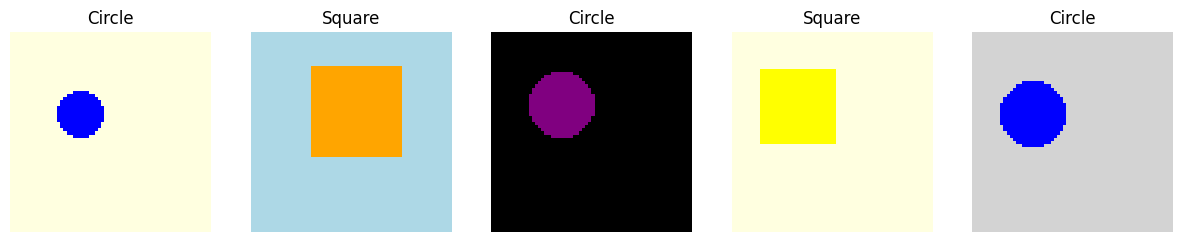

In [33]:
fig, axes = plt.subplots(1, 5, figsize = (15, 15))
label_map = {0: "Circle", 1: "Square"}

for i in range(5):
    ax = axes[i]
    idx = np.random.randint(0, len(X))
    ax.imshow(X[idx])
    ax.set_title(f"{label_map[y[idx]]}")
    ax.axis('off')
    
plt.show()

## Pre-processing the Data

Before we feed the data into a neural network, we need to pre-process it. This involves normalizing the image data (scale pixel values from [0, 255] to [0, 1]) and converting the labels into a suitable format for classification.

#### Imported Libraries

In [34]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [35]:
# normalize images
X = X / 255.0

# one-hot encode labels
y_encoded = to_categorical(y, num_classes=2)

# split data into training & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Defining & Training the CNN Model

#### Imported Libraries

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [67]:
model = Sequential()

# first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second conv layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# third
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten the results to feed into a fully connected layer
model.add(Flatten())

# fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# use dropout to prevent overfitting
model.add(Dropout(0.5))

# output layer (2 classes for circle or square)
model.add(Dense(2, activation='softmax'))

model.summary()

/Users/iverleigh/anaconda3/envs/cnn_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-19 10:35:38.590744: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-09-19 10:35:38.591499: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-19 10:35:38.593203: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-19 10:35:38.593740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-19 10:35:38.593964: I tensorflow/core/common_runtime/pluggable_device/pluggable

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [69]:
# train and use 20% of training data for validation
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2)

Epoch 1/10


2024-09-19 10:36:07.536666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.8946 - loss: 0.1838 - val_accuracy: 1.0000 - val_loss: 2.6150e-05
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 1.0000 - loss: 6.7120e-05 - val_accuracy: 1.0000 - val_loss: 2.1369e-06
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9991 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 1.3458e-05
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 1.0000 - loss: 8.0686e-05 - val_accuracy: 1.0000 - val_loss: 1.9024e-06
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 1.0000 - loss: 1.5051e-05 - val_accuracy: 1.0000 - val_loss: 2.9144e-07
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 1.0000 - loss: 2.0554e-06 - val_accuracy: 1.0000 - val_loss: 1.2654e-07
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9999 - loss: 3.6937e-04 - val_accuracy: 1.0000 - val_loss: 4.9916e-06
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━

## Evaluating the Model

In [70]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 1.0000 - loss: 5.0780e-08
Test accuracy: 1.0


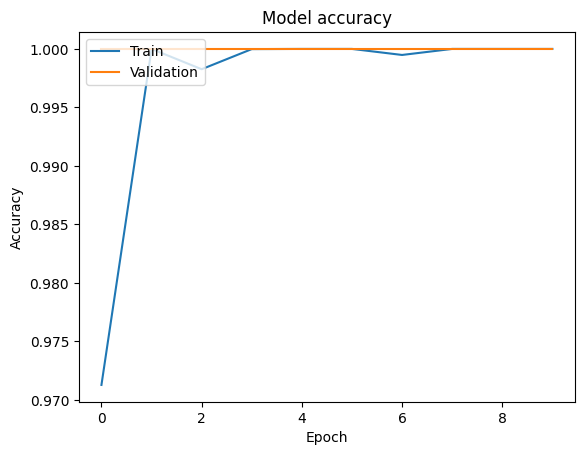

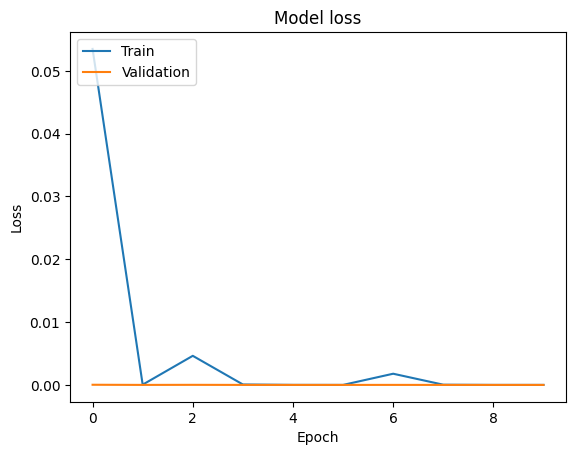

In [71]:
# training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Observations & Conclusions

- training accuracy starts at 89.46% in epoch 1 and reached 100% by epoch 2
- training loss consistently decreases, very small values in epoch 10
- validation accuracy is 100% at each epoch after epoch 1
- validation loss very low by epoch 10
- test accuracy = 100% and test loss very low
<br>
<br>

In conclusion, the model:
- can perfectly classify training data
- handles validation set perfectly
- classifies test set perfectly

<br>

Interpretation:
- model has overfitted to dataset
- data is too simple for the model
- complexity of model is too high for the task

## Potential Considerations

- <mark>use simpler model</mark>
- add a regularization technique to make the model more robust.
- monitor validation loss/accuracy and stop training when improvement stagnates.
- check learning rate and adjust this to prevent the instability observed.

## Using Simpler Models

Now I demonstrate that we can achieve similar results using simpler models trained on the same data. The ML techniques I will be using is a <b>Random Forest</b> classifier.

### Random Forest

In [37]:
print("Dimensions of data: ", X.shape)

Dimensions of data:  (100000, 64, 64, 3)


- 100,000 images
- each image has 64x64 pixels
- 3 color channels (R, G, B)
  
<br>Each image has 64 x 64 x 3 = 12,288 pixels.
<br>To use a Random Forest model, we need to flatten each image (note that we have already scaled the pixel values to [0, 1] earlier). We need to reshape the data so that each image is represented as a 1D vector with 12,288 features.

In [38]:
X_flat = X.reshape(100000, -1)
print("New shape: ", X_flat.shape)

New shape:  (100000, 12288)


#### Imported Libraries

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Training and Using the Model for Predictions

In [41]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_flat, y, test_size = 0.2, random_state = 42)

rf = RandomForestClassifier(n_estimators = 50, n_jobs = -1, random_state = 42)

rf.fit(X2_train, y2_train)

y2_pred = rf.predict(X2_test)

rf_acc = accuracy_score(y2_test, y2_pred)
print("Random Forest Model Accuracy: ", rf_acc)

Random Forest Model Accuracy:  0.99215
